<font size="3">Heart Disease Dataset Documentation

Introduction

Cardiovascular diseases are among the leading causes of death globally, necessitating the development of effective predictive models for early diagnosis. This project focuses on a heart disease dataset that captures various clinical and demographic factors that may contribute to heart-related conditions. By employing advanced machine learning techniques, specifically CatBoost, the aim is to identify key predictors of heart disease and evaluate the model's effectiveness in classification tasks.
</font>

<font size="3">Importing Required Libraries

In this section, we import the necessary libraries for data handling, visualization, preprocessing, and building the deep learning model.</font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report , confusion_matrix , roc_curve, auc  
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import LocalOutlierFactor

<font size="3">Loading and Exploring the Dataset

We load the dataset and check its structure, including image dimensions and labels. This helps us understand what kind of data we are working with.

Dataset Description

The heart disease dataset consists of several attributes related to patient demographics and clinical measurements. The dataset includes the following features:
Age: The age of the patient (in years).
Sex: The gender of the patient (1 = male, 0 = female).
Chest Pain Type: The type of chest pain experienced by the patient (values range from 0 to 3).
Resting Blood Pressure (RestingBP): The patient's resting blood pressure (in mm Hg).
Cholesterol: Serum cholesterol level (in mg/dl).
Fasting Blood Sugar (FastingBS): Fasting blood sugar level (1 if > 120 mg/dl, 0 otherwise).
Resting Electrocardiographic Results (RestingECG): The results of electrocardiography at rest (values range from 0 to 2).
Maximum Heart Rate Achieved (MaxHR): The maximum heart rate achieved during exercise.
Exercise Induced Angina (ExerciseAngina): Presence of angina induced by exercise (1 = yes, 0 = no).
Oldpeak: ST depression induced by exercise (in units).
Slope of the Peak Exercise ST Segment (ST_Slope): The slope of the peak exercise ST segment (values range from 0 to 2).
Heart Disease: The target variable indicating the presence of heart disease (1 = presence, 0 = absence).</font>

In [2]:
data = pd.read_csv('heart1.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<font size="3">Data Preprocessing:

 The dataset was preprocessed to remove missing values and handle any anomalies. Continuous variables were standardized, while categorical features were encoded appropriately, particularly with the use of CatBoost, which can natively handle categorical data.

Exploratory Data Analysis (EDA):

 Exploratory analysis was conducted to visualize the relationships between the features and the target variable. Visualization tools, such as correlation heatmaps, scatter plots, and box plots, were utilized to gain insights into the underlying patterns in the data.</font>

In [3]:
np.unique(data['HeartDisease'] , return_counts=True)

(array([0, 1], dtype=int64), array([410, 508], dtype=int64))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<font size="3">Distribution plot of cholesterol levels in patients, illustrating the frequency and variability of cholesterol levels as a risk factor for heart disease.</font>

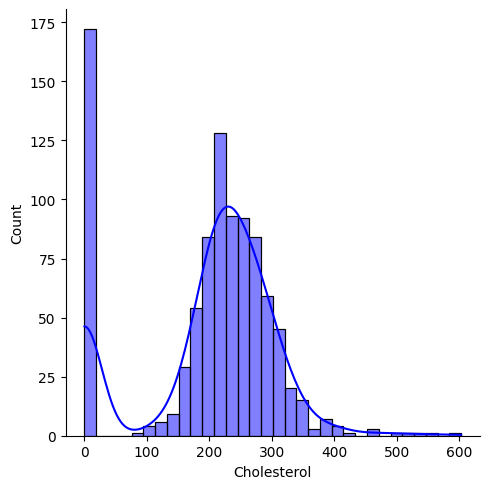

In [7]:
sns.displot(data['Cholesterol'] , kde = True, color = 'blue')

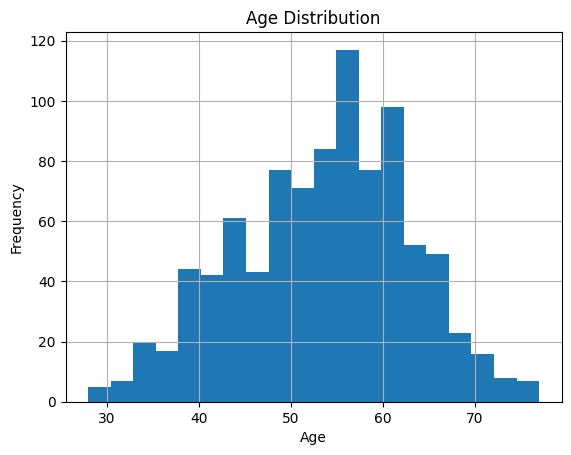

In [8]:
data['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

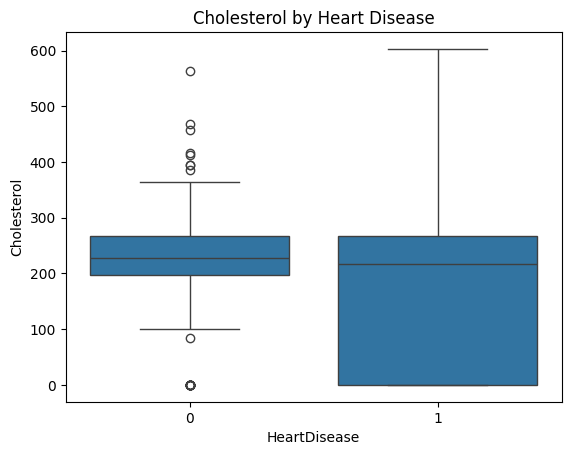

In [9]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data)
plt.title('Cholesterol by Heart Disease')
plt.show()

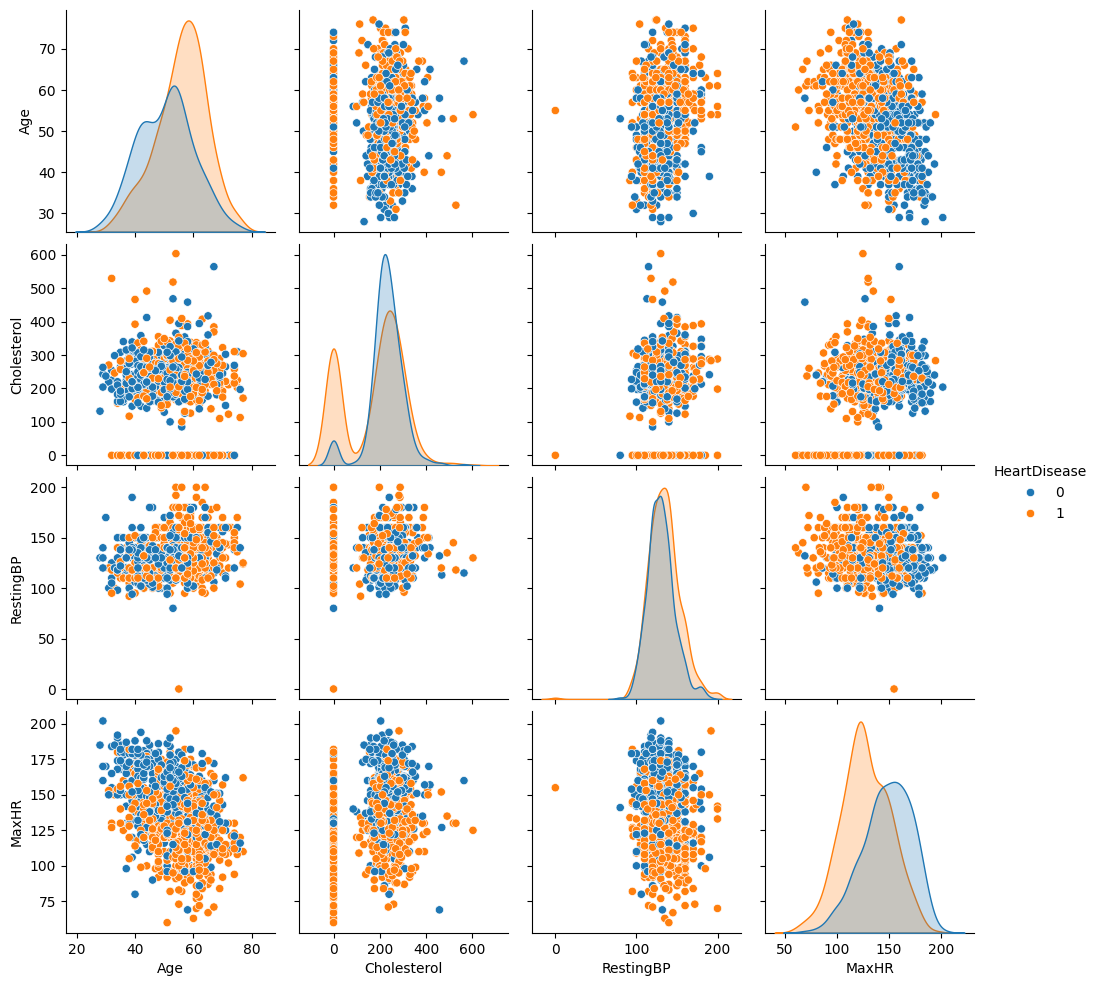

In [10]:
sns.pairplot(data[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'HeartDisease']], hue='HeartDisease')
plt.show()

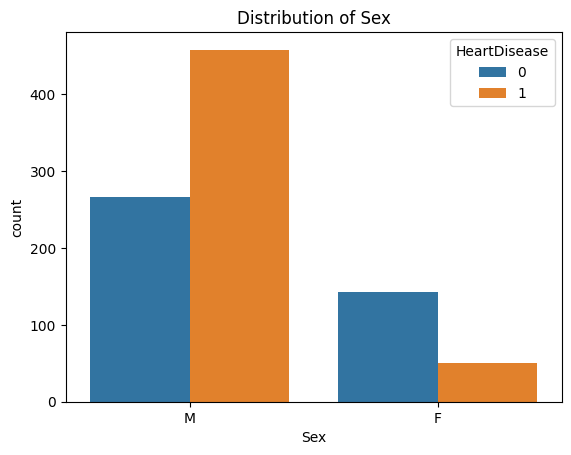

In [13]:
sns.countplot(x='Sex', data=data , hue='HeartDisease')
plt.title('Distribution of Sex')
plt.show()

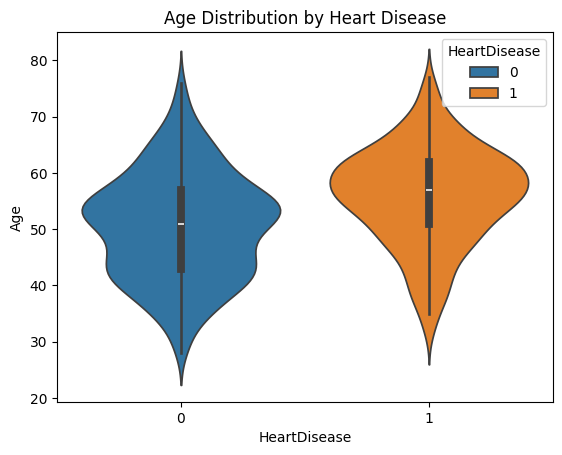

In [16]:
sns.violinplot(x='HeartDisease', y='Age', data=data , hue='HeartDisease')
plt.title('Age Distribution by Heart Disease')
plt.show()

<font size="3">label encoding on categorical data</font>

In [17]:
le_ExerciseAngina = LabelEncoder()
data['ExerciseAngina'] = le_ExerciseAngina.fit_transform(data['ExerciseAngina'])
le_Sex = LabelEncoder()
data['Sex'] = le_Sex.fit_transform(data['Sex'])
le_RestingECG = LabelEncoder()
data['RestingECG'] = le_RestingECG.fit_transform(data['RestingECG'])
le_ST_Slope = LabelEncoder()
data['ST_Slope'] = le_ST_Slope.fit_transform(data['ST_Slope'])
le_ChestPainType = LabelEncoder()
data['ChestPainType'] = le_ChestPainType.fit_transform(data['ChestPainType'])

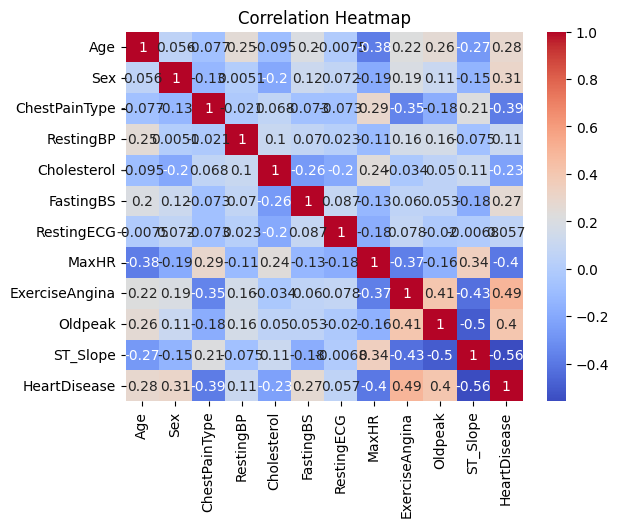

In [18]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# filling the missing values of Cholesterol
data['Cholesterol_was_zero'] = (data['Cholesterol'] == 0).astype(int)
data.loc[data['Cholesterol'] == 0, 'Cholesterol'] = data.loc[data['Cholesterol'] != 0, 'Cholesterol'].median()

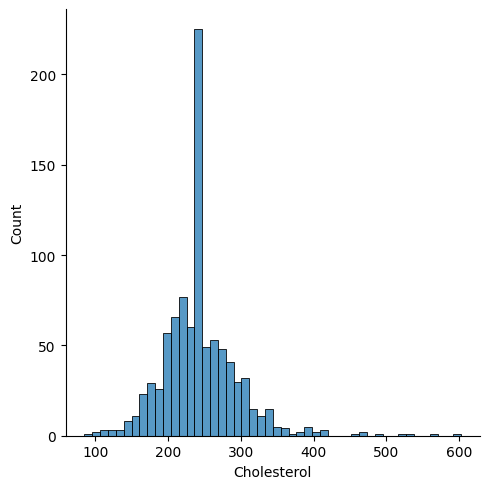

In [20]:
# displot after filling the missing values
sns.displot(data['Cholesterol'])

In [21]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_was_zero
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1,0
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0


In [22]:
data['heartDisease'] = data['HeartDisease']
data.drop(columns='HeartDisease' , inplace=True)

<font size="3">Scaling Data</font>

In [23]:
scaler = StandardScaler()
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])

<font size="3">Splitting Data into Training and Testing Sets

We split the dataset into training and testing sets using a fixed random seed for reproducibility.</font>

In [24]:
X = data.iloc[:,:-1]
y = data.heartDisease
x_train , x_test , y_train , y_test = train_test_split(X , y  , test_size=0.25 , random_state=42)

<font size="3">catboostclassifier to predict diabetes</font>

In [25]:
catboost = CatBoostClassifier(learning_rate=0.05 , iterations=1000 , max_depth=5 , eval_metric='Recall')
catboost.fit(x_train, y_train , eval_set=(x_test , y_test))

0:	learn: 0.8590426	test: 0.7954545	best: 0.7954545 (0)	total: 127ms	remaining: 2m 6s
1:	learn: 0.9069149	test: 0.8484848	best: 0.8484848 (1)	total: 130ms	remaining: 1m 4s
2:	learn: 0.9069149	test: 0.8257576	best: 0.8484848 (1)	total: 134ms	remaining: 44.6s
3:	learn: 0.9122340	test: 0.8333333	best: 0.8484848 (1)	total: 137ms	remaining: 34.1s
4:	learn: 0.9122340	test: 0.8409091	best: 0.8484848 (1)	total: 139ms	remaining: 27.7s
5:	learn: 0.9015957	test: 0.8333333	best: 0.8484848 (1)	total: 142ms	remaining: 23.5s
6:	learn: 0.9015957	test: 0.8257576	best: 0.8484848 (1)	total: 143ms	remaining: 20.3s
7:	learn: 0.9122340	test: 0.8409091	best: 0.8484848 (1)	total: 146ms	remaining: 18.1s
8:	learn: 0.9175532	test: 0.8333333	best: 0.8484848 (1)	total: 148ms	remaining: 16.3s
9:	learn: 0.9175532	test: 0.8181818	best: 0.8484848 (1)	total: 151ms	remaining: 15s
10:	learn: 0.9228723	test: 0.8257576	best: 0.8484848 (1)	total: 153ms	remaining: 13.8s
11:	learn: 0.9175532	test: 0.8409091	best: 0.8484848 (1

<font size="3">Test data accuracy with catboost model</font>

In [26]:
y_pred = catboost.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.93      0.92      0.92       132

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



<font size="3">confusion matrix</font>

In [27]:
print(confusion_matrix(y_test , y_pred))

[[ 89   9]
 [ 11 121]]


<font size='3'>Displaying the Confusion Matrix 

In this section, we create and visualize the confusion matrix to assess the performance of our classification model.
The confusion matrix summarizes the true positive, true negative, false positive, and false negative predictions. 
This helps us understand how well the model is performing in distinguishing between fraudulent and non-fraudulent transactions</font>


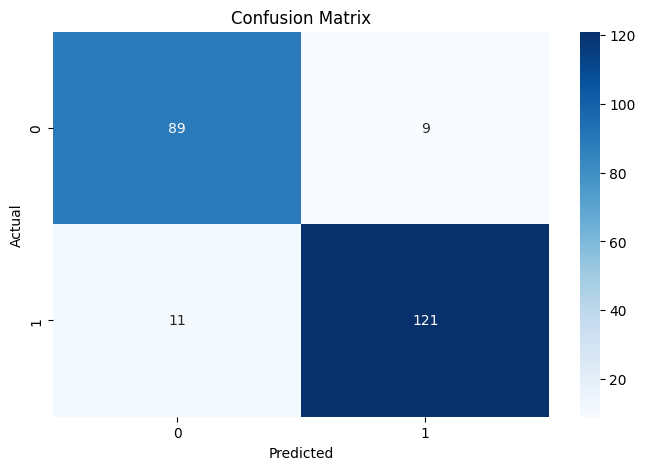

In [28]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<font size="3">cross validation</font>

In [29]:
cv_scores = cross_val_score(catboost, X, y, cv=5, scoring='accuracy')  # استفاده از Cross-Validation
print(f"catboost Mean Accuracy: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

0:	learn: 0.8546798	total: 1.85ms	remaining: 1.85s
1:	learn: 0.8448276	total: 3.96ms	remaining: 1.98s
2:	learn: 0.8620690	total: 6.44ms	remaining: 2.14s
3:	learn: 0.8817734	total: 8.7ms	remaining: 2.17s
4:	learn: 0.8768473	total: 10.4ms	remaining: 2.08s
5:	learn: 0.8842365	total: 12.1ms	remaining: 2.01s
6:	learn: 0.8990148	total: 14.2ms	remaining: 2.01s
7:	learn: 0.9039409	total: 15.9ms	remaining: 1.98s
8:	learn: 0.9039409	total: 17.8ms	remaining: 1.96s
9:	learn: 0.9064039	total: 19.7ms	remaining: 1.95s
10:	learn: 0.8965517	total: 21.5ms	remaining: 1.93s
11:	learn: 0.8990148	total: 23ms	remaining: 1.89s
12:	learn: 0.8891626	total: 24.8ms	remaining: 1.88s
13:	learn: 0.8891626	total: 26.4ms	remaining: 1.86s
14:	learn: 0.8965517	total: 27.9ms	remaining: 1.83s
15:	learn: 0.8965517	total: 29.7ms	remaining: 1.83s
16:	learn: 0.8990148	total: 31.1ms	remaining: 1.8s
17:	learn: 0.9039409	total: 32.3ms	remaining: 1.76s
18:	learn: 0.8990148	total: 33.6ms	remaining: 1.73s
19:	learn: 0.9014778	total

<font size="3">Visualize Importance:

 Plot the feature importance</font>

Text(0.5, 1.0, 'feature importance in random forest model')

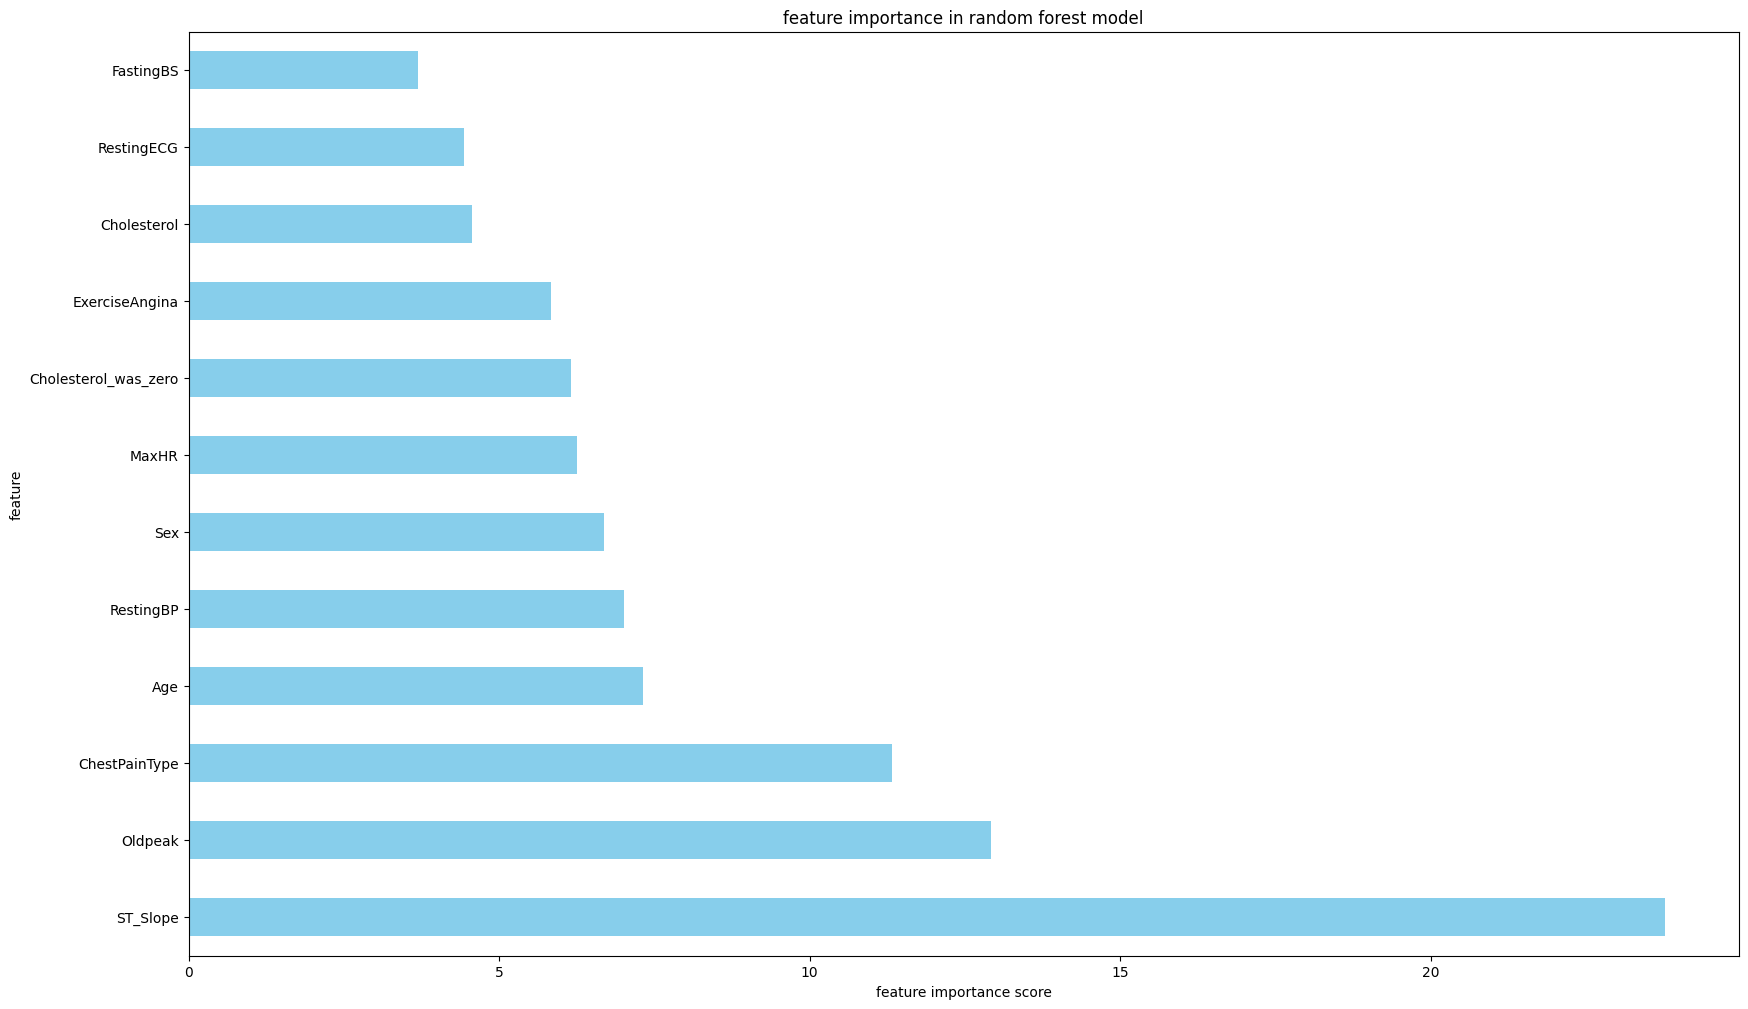

In [30]:
x_train = pd.DataFrame(x_train)
feature_importances = pd.Series(catboost.feature_importances_ , index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color = 'skyblue', figsize=(20, 12))
plt.xlabel('feature importance score')
plt.ylabel('feature')
plt.title('feature importance in random forest model')

<font size=3>ROC Curve

This ROC Curve visualizes the performance of the trained model at various threshold settings. The curve illustrates the trade-off between the True Positive Rate (Recall) and the False Positive Rate across different classification thresholds. A model with a perfect classification capability would have a curve that follows the left-hand border and then the top border of the ROC space, resulting in an area under the curve (AUC) of 1.0. The closer the curve is to the top left corner, the better the model's performance.</font>

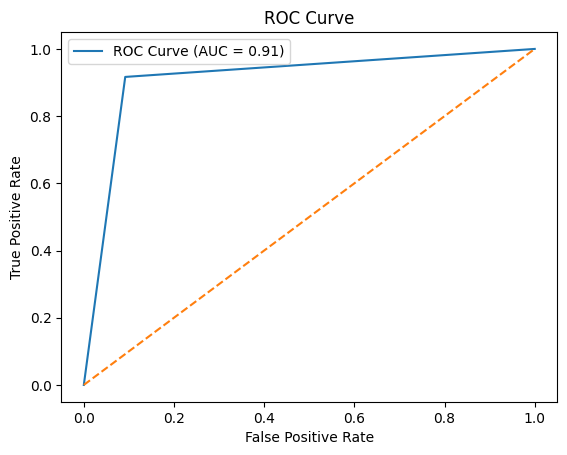

In [31]:
y_probs = catboost.predict(x_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<font size="3">Documentation for CatBoost Modeling After Removing Outliers Using LOF

Introduction

In this phase of the project, we focused on improving model accuracy and reducing noise in the data by eliminating outliers from the dataset. After removing these outliers, we will rebuild the prediction model for heart disease using the CatBoost algorithm.

Outlier Removal

Identifying Outliers with Local Outlier Factor (LOF)

Outliers are abnormal observations that can adversely affect model performance. For the identification of outliers, the Local Outlier Factor (LOF) method was used:

Local Outlier Factor (LOF): This method measures the local density deviation of a given data point with respect to its neighbors. A data point is considered an outlier if its LOF score is significantly greater than 1.

Removing Outliers

After identifying outliers with LOF, these data points were removed from the dataset to create a cleaner dataset for modeling.

Re-Modeling with CatBoost

Following the outlier removal, the following steps were undertaken to build a new model:
Data Preparation: The cleaned dataset was loaded, and features were redefined.
Model Training: The CatBoostClassifier algorithm was employed, with parameter settings optimized to enhance model accuracy.

Model Evaluation:

The model's performance was evaluated using various metrics such as accuracy, precision, and F1 score</font>

In [32]:
lof = LocalOutlierFactor(n_neighbors=10)
y_pred = lof.fit_predict(X)
y_pred[y_pred  == 1] = 0
y_pred[y_pred  == -1] = 1
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
#Filter
data['lof'] = y_pred
df = data[data['lof'] == 0]
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Cholesterol_was_zero,heartDisease,lof
0,-1.433140,0.515952,0.229032,0.410909,0.858035,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,-0.48017,0,0
1,-0.478484,-1.938163,1.275059,1.491752,-1.184227,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,-0.48017,1,0
2,-1.751359,0.515952,0.229032,-0.129513,0.745617,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,-0.48017,0,0
3,-0.584556,-1.938163,-0.816995,0.302825,-0.547191,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,-0.48017,1,0
4,0.051881,0.515952,1.275059,0.951331,-0.903182,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,-0.48017,0,0


<font size="3">train test split</font>

In [34]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2]
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state=42)

<font size="3">catboost model</font>

In [35]:
catboost2 = CatBoostClassifier(learning_rate=0.05 , iterations=1000 , max_depth=5 , eval_metric='Recall')
catboost2.fit(x_train, y_train , eval_set=(x_test , y_test))

0:	learn: 0.8652291	test: 0.7968750	best: 0.7968750 (0)	total: 2.38ms	remaining: 2.38s
1:	learn: 0.8894879	test: 0.8593750	best: 0.8593750 (1)	total: 5.57ms	remaining: 2.78s
2:	learn: 0.9056604	test: 0.8203125	best: 0.8593750 (1)	total: 7.24ms	remaining: 2.41s
3:	learn: 0.9083558	test: 0.8593750	best: 0.8593750 (1)	total: 8.77ms	remaining: 2.18s
4:	learn: 0.9137466	test: 0.8828125	best: 0.8828125 (4)	total: 10.4ms	remaining: 2.08s
5:	learn: 0.9110512	test: 0.8828125	best: 0.8828125 (4)	total: 11.5ms	remaining: 1.9s
6:	learn: 0.9083558	test: 0.8671875	best: 0.8828125 (4)	total: 12.7ms	remaining: 1.79s
7:	learn: 0.9056604	test: 0.8828125	best: 0.8828125 (4)	total: 13.8ms	remaining: 1.71s
8:	learn: 0.9056604	test: 0.8828125	best: 0.8828125 (4)	total: 15.2ms	remaining: 1.67s
9:	learn: 0.9110512	test: 0.8984375	best: 0.8984375 (9)	total: 16.5ms	remaining: 1.64s
10:	learn: 0.9137466	test: 0.8906250	best: 0.8984375 (9)	total: 18ms	remaining: 1.61s
11:	learn: 0.9191375	test: 0.8906250	best: 0.

<font size="3">Test data accuracy with catboost model</font>

In [36]:
y_pred = catboost2.predict(x_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        97
           1       0.90      0.91      0.91       128

    accuracy                           0.89       225
   macro avg       0.89      0.89      0.89       225
weighted avg       0.89      0.89      0.89       225



<font size="3">confusion matrix</font>

In [37]:
print(confusion_matrix(y_test , y_pred))

[[ 84  13]
 [ 11 117]]


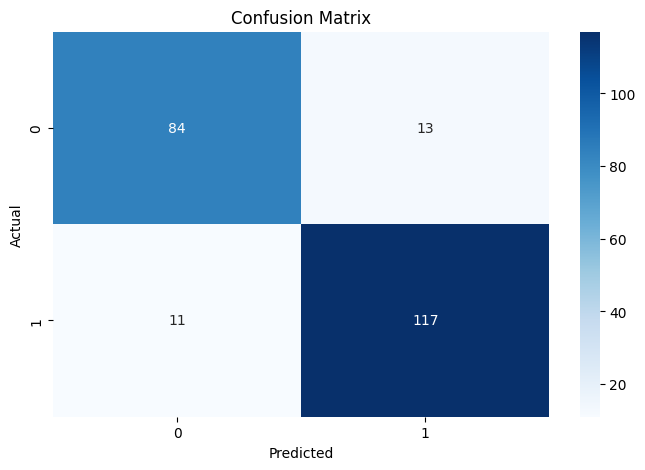

In [38]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<font size="3">cross validation</font>

In [39]:
cv_scores = cross_val_score(catboost2, X, y, cv=5, scoring='accuracy')  # استفاده از Cross-Validation
print(f"catboost Mean Accuracy: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

0:	learn: 0.8375000	total: 1.21ms	remaining: 1.21s
1:	learn: 0.8425000	total: 2.85ms	remaining: 1.42s
2:	learn: 0.8725000	total: 4.25ms	remaining: 1.41s
3:	learn: 0.8750000	total: 6.22ms	remaining: 1.55s
4:	learn: 0.8750000	total: 8.69ms	remaining: 1.73s
5:	learn: 0.8700000	total: 11.2ms	remaining: 1.86s
6:	learn: 0.8825000	total: 14.7ms	remaining: 2.09s
7:	learn: 0.8975000	total: 16.6ms	remaining: 2.06s
8:	learn: 0.8925000	total: 18.2ms	remaining: 2s
9:	learn: 0.9050000	total: 19.9ms	remaining: 1.97s
10:	learn: 0.9075000	total: 21.7ms	remaining: 1.95s
11:	learn: 0.9050000	total: 23.8ms	remaining: 1.96s
12:	learn: 0.9050000	total: 26.6ms	remaining: 2.02s
13:	learn: 0.9025000	total: 27.8ms	remaining: 1.96s
14:	learn: 0.9050000	total: 29.1ms	remaining: 1.91s
15:	learn: 0.9050000	total: 30.1ms	remaining: 1.85s
16:	learn: 0.9075000	total: 31.1ms	remaining: 1.79s
17:	learn: 0.9100000	total: 31.9ms	remaining: 1.74s
18:	learn: 0.9075000	total: 32.8ms	remaining: 1.69s
19:	learn: 0.9050000	tota

<font size="3">Visualize Importance:

 Plot the feature importance</font>

Text(0.5, 1.0, 'feature importance in random forest model')

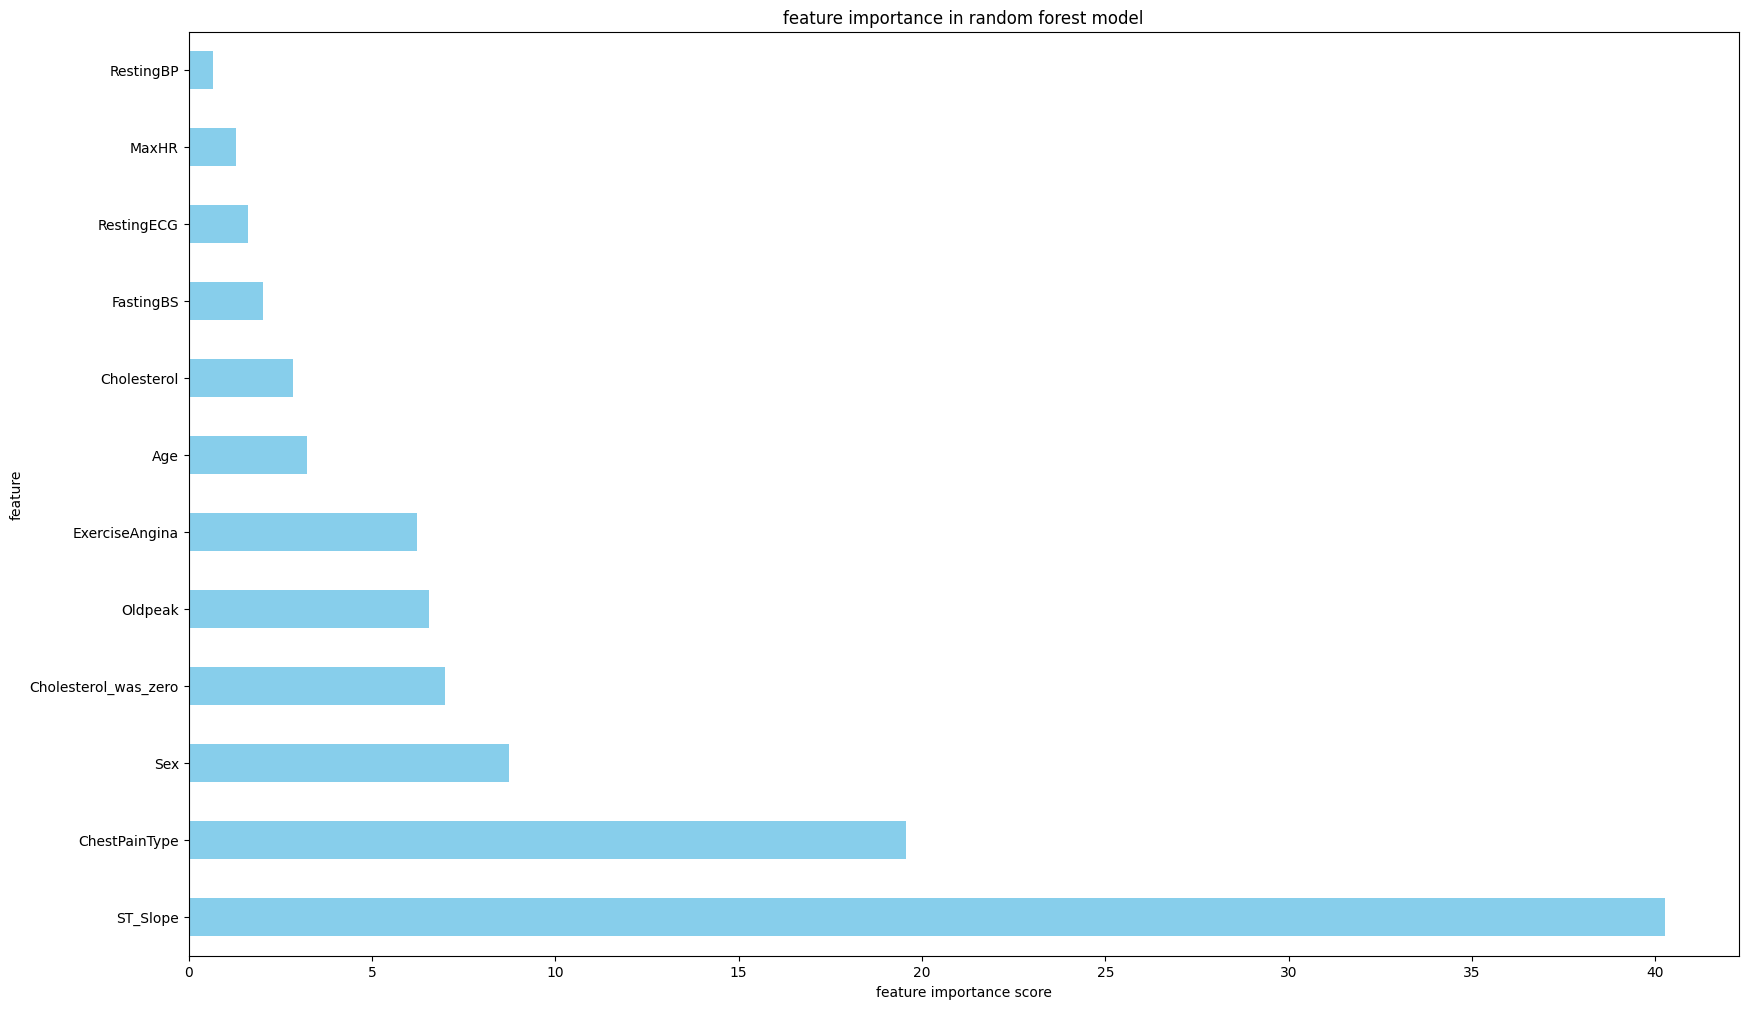

In [40]:
x_train = pd.DataFrame(x_train)
feature_importances = pd.Series(catboost2.feature_importances_ , index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color = 'skyblue', figsize=(20, 12))
plt.xlabel('feature importance score')
plt.ylabel('feature')
plt.title('feature importance in random forest model')

<font size=3>ROC Curve</font>

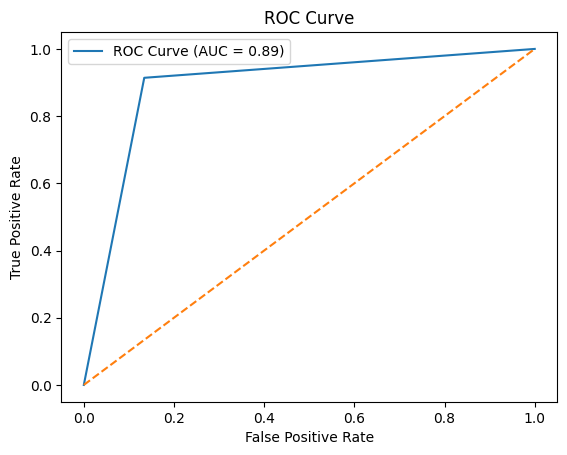

In [41]:
y_probs = catboost2.predict(x_test).ravel()
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<font size="3">Save lable encoder and scaler and best model for predict new data</font>

In [42]:
with open('le_ExerciseAngina.pkl' , 'wb') as file:
    pickle.dump(le_ExerciseAngina, file)

with open('le_Sex.pkl' , 'wb') as file:
    pickle.dump(le_Sex, file)

with open('le_RestingECG.pkl' , 'wb') as file:
    pickle.dump(le_RestingECG, file)

with open('le_ST_Slope.pkl' , 'wb') as file:
    pickle.dump(le_ST_Slope, file)

with open('le_ChestPainType.pkl' , 'wb') as file:
    pickle.dump(le_ChestPainType, file)

with open('scaler.pkl' , 'wb') as file:
    pickle.dump(scaler, file)

with open('catboost_model_heart.pkl' , 'wb') as file:
    pickle.dump(catboost, file)